# E-Commerce Real Customers 

We will be using Linear Regression to advise a (fake) Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

We'll first explore this data, before using Linear Regression to study the correlations between the different factors and how they affect the how much the customer spends.

# Import the Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the Dataset

In [2]:
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:20,.2f}'.format
encoding_latin = 'latin'
df = pd.read_csv('D:/DataSets/Ecommerce Customers.csv', low_memory = False, encoding = encoding_latin)
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.50,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.93,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.31,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33,12.80,37.54,4.45,599.41
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.87,12.03,34.48,5.49,637.10
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.02,11.37,36.68,4.69,521.57
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.74,12.35,37.37,4.43,549.90
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.99,13.39,37.53,3.27,570.20
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.94,11.81,37.15,3.20,427.20


# Data Preprocessing 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.00,33.05,0.99,29.53,32.34,33.08,33.71,36.14
Time on App,500.00,12.05,0.99,8.51,11.39,11.98,12.75,15.13
Time on Website,500.00,37.06,1.01,33.91,36.35,37.07,37.72,40.01
Length of Membership,500.00,3.53,1.00,0.27,2.93,3.53,4.13,6.92
Yearly Amount Spent,500.00,499.31,79.31,256.67,445.04,498.89,549.31,765.52


In [6]:
df['Avatar'].value_counts()

GreenYellow             7
Cyan                    7
Teal                    7
CadetBlue               7
SlateBlue               7
                       ..
NavajoWhite             1
Azure                   1
PapayaWhip              1
LightGoldenRodYellow    1
LightSlateGray          1
Name: Avatar, Length: 138, dtype: int64

In [7]:
df.Avatar.unique()

array(['Violet', 'DarkGreen', 'Bisque', 'SaddleBrown', 'MediumAquaMarine',
       'FloralWhite', 'DarkSlateBlue', 'Aqua', 'Salmon', 'Brown',
       'Tomato', 'RoyalBlue', 'DarkBlue', 'Peru', 'PowderBlue',
       'OliveDrab', 'Cyan', 'LightSeaGreen', 'PeachPuff', 'Black',
       'Olive', 'Silver', 'Wheat', 'Teal', 'Linen', 'MediumSlateBlue',
       'LemonChiffon', 'DarkOrchid', 'SeaGreen', 'SteelBlue',
       'DarkMagenta', 'DarkGoldenRod', 'DarkSeaGreen', 'Gainsboro',
       'HotPink', 'HoneyDew', 'WhiteSmoke', 'GhostWhite', 'Chocolate',
       'Snow', 'BurlyWood', 'Moccasin', 'BlueViolet', 'MediumBlue',
       'GreenYellow', 'SandyBrown', 'MediumVioletRed', 'DarkOliveGreen',
       'DarkSalmon', 'DeepPink', 'SkyBlue', 'Magenta', 'DarkTurquoise',
       'SpringGreen', 'OrangeRed', 'LimeGreen', 'LightGreen',
       'LightYellow', 'MintCream', 'DimGray', 'Indigo', 'LightSalmon',
       'DeepSkyBlue', 'Turquoise', 'LightSteelBlue', 'Cornsilk',
       'DarkKhaki', 'FireBrick', 'SlateGray',

In [8]:
df.rename(columns = {'Avg. Session Length':'Avg._Session_Length', 'Time on App':'Time_on_App', 'Time on Website':'Time_on_Website', 
                     'Length of Membership':'Length_of_Membership', 'Yearly Amount Spent':'Yearly_Amount_Spent'}, inplace = True)

# Exploratory Data Analysis

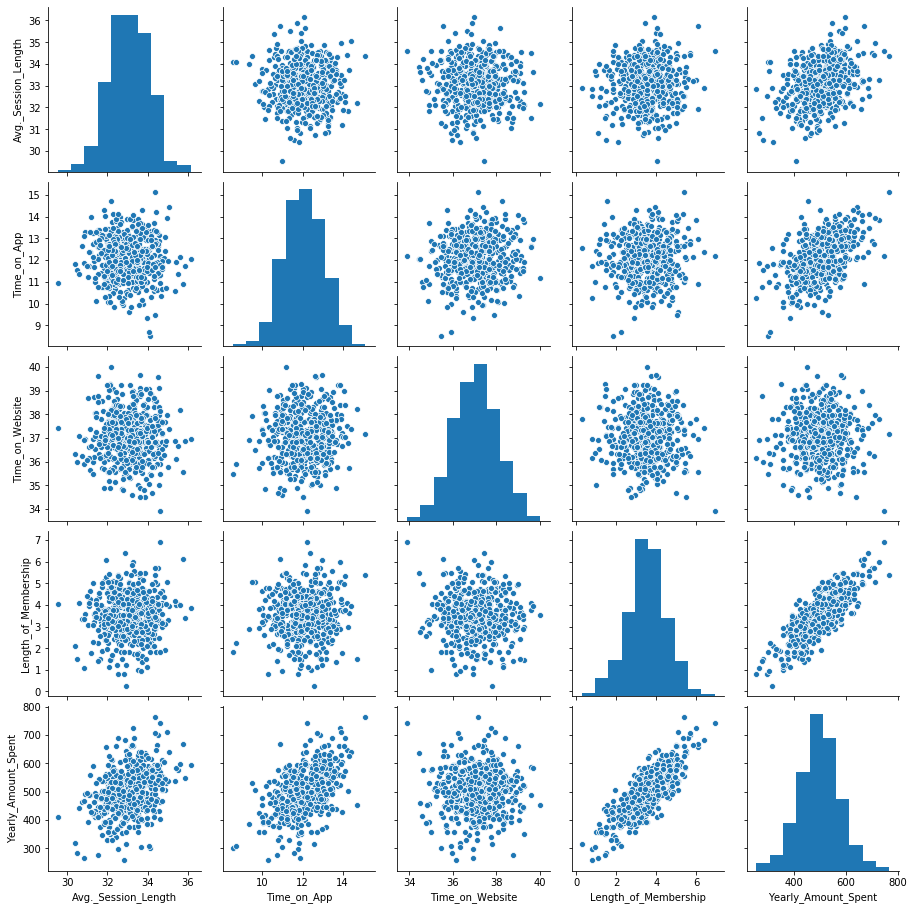

In [9]:
sns.pairplot(df)

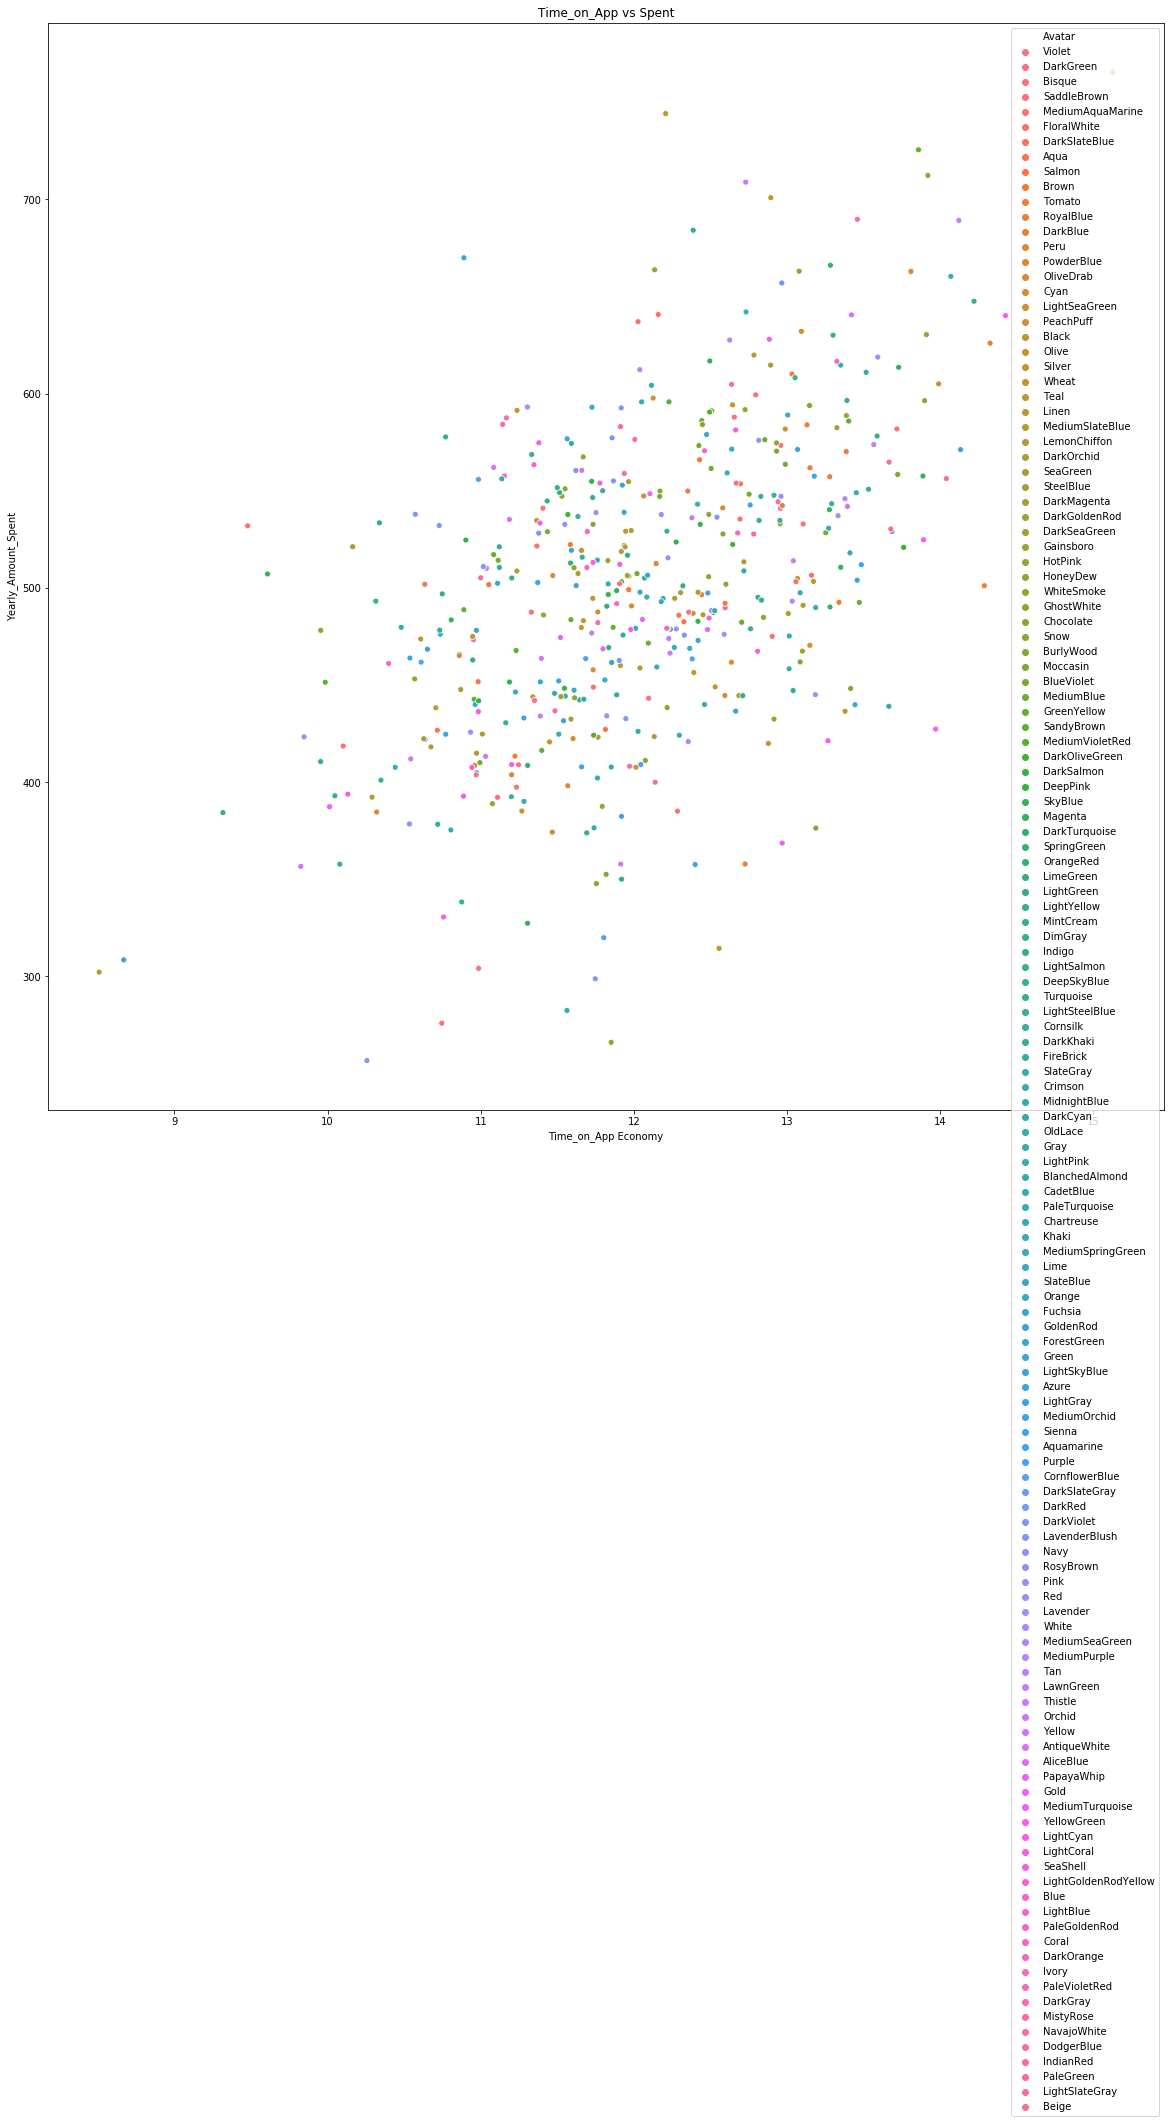

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(20,20))
plt.title('Time_on_App vs Spent')
sns.scatterplot(x = df['Time_on_App'], y = df['Yearly_Amount_Spent'], hue = df['Avatar'])
plt.xlabel('Time_on_App Economy')
plt.ylabel('Yearly_Amount_Spent')
plt.show()
plt.tight_layout()

In [11]:
df.corr()

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg._Session_Length,1.00,-0.03,-0.03,0.06,0.36
Time_on_App,-0.03,1.00,0.08,0.03,0.50
Time_on_Website,-0.03,0.08,1.00,-0.05,-0.00
Length_of_Membership,0.06,0.03,-0.05,1.00,0.81
Yearly_Amount_Spent,0.36,0.50,-0.00,0.81,1.00


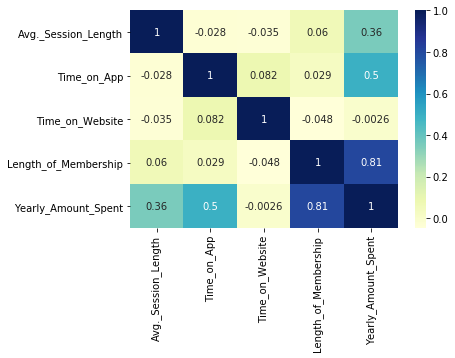

In [12]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

# Import some of the Model Building Libraries

In [13]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Split the Dataset into Train & Test

In [14]:
X = df.drop(['Email', 'Address', 'Avatar','Yearly_Amount_Spent'], axis = 1)
X.head()

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
0,34.50,12.66,39.58,4.08
1,31.93,11.11,37.27,2.66
2,33.00,11.33,37.11,4.10
3,34.31,13.72,36.72,3.12
4,33.33,12.80,37.54,4.45


In [15]:
y = df['Yearly_Amount_Spent']
y.head()

0                 587.95
1                 392.20
2                 487.55
3                 581.85
4                 599.41
Name: Yearly_Amount_Spent, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [17]:
scaler = MinMaxScaler()
num_vars = ['Avg._Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head(10)

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
205,0.86,0.82,0.71,0.72
404,0.43,0.61,0.49,0.49
337,0.36,0.60,0.62,0.41
440,0.58,0.52,0.51,0.49
55,0.69,0.47,0.24,0.47
111,0.39,0.55,0.67,0.52
157,0.80,0.56,0.00,1.00
18,0.42,0.94,0.76,0.19
408,0.55,0.41,0.54,0.53
61,0.56,0.17,0.45,0.72


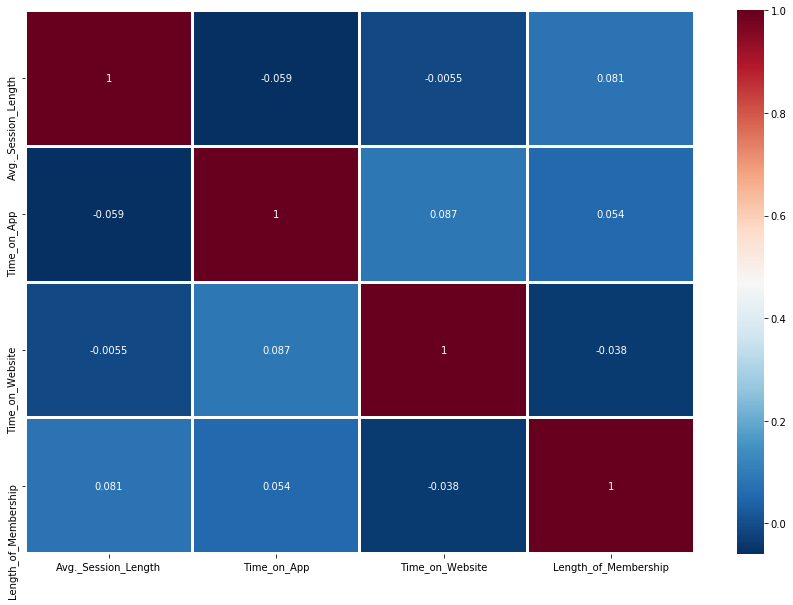

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="RdBu_r", linecolor = 'white', linewidths = 2)
plt.show()

# Building the Model

## Build the Model Using Stats Model

In [19]:
print(X_train.shape)
print(X_test.shape)

(400, 4)
(100, 4)


In [20]:
#X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train).fit()

In [21]:
lr.params

Avg._Session_Length                  199.92
Time_on_App                          290.70
Time_on_Website                       27.60
Length_of_Membership                 439.51
dtype: float64

In [22]:
print(lr.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Yearly_Amount_Spent   R-squared (uncentered):                   0.999
Model:                             OLS   Adj. R-squared (uncentered):              0.999
Method:                  Least Squares   F-statistic:                          1.251e+05
Date:                 Wed, 26 Aug 2020   Prob (F-statistic):                        0.00
Time:                         22:59:55   Log-Likelihood:                         -1628.7
No. Observations:                  400   AIC:                                      3265.
Df Residuals:                      396   BIC:                                      3281.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Predicting the Model

In [23]:
pred = lr.predict(X_test)
print(pred)

69               12,351.05
29               13,209.95
471              12,997.71
344              12,247.10
54               12,876.39
              ...         
460              13,357.05
152              13,094.41
154              13,446.78
56               12,935.57
392              13,070.49
Length: 100, dtype: float64


Text(0, 0.5, 'Predicted Y')

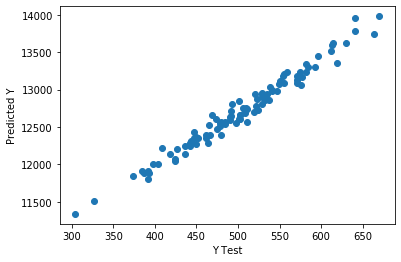

In [24]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Build the Model Using Scikit - Learn

In [25]:
X = df.drop(['Email', 'Address', 'Avatar','Yearly_Amount_Spent'], axis = 1)
X.head()

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
0,34.50,12.66,39.58,4.08
1,31.93,11.11,37.27,2.66
2,33.00,11.33,37.11,4.10
3,34.31,13.72,36.72,3.12
4,33.33,12.80,37.54,4.45


In [26]:
y = df['Yearly_Amount_Spent']
y.head()

0                 587.95
1                 392.20
2                 487.55
3                 581.85
4                 599.41
Name: Yearly_Amount_Spent, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [28]:
scaler = MinMaxScaler()
num_vars = ['Avg._Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head(10)

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Devmallya Karar\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
205,0.86,0.82,0.71,0.72
404,0.43,0.61,0.49,0.49
337,0.36,0.60,0.62,0.41
440,0.58,0.52,0.51,0.49
55,0.69,0.47,0.24,0.47
111,0.39,0.55,0.67,0.52
157,0.80,0.56,0.00,1.00
18,0.42,0.94,0.76,0.19
408,0.55,0.41,0.54,0.53
61,0.56,0.17,0.45,0.72


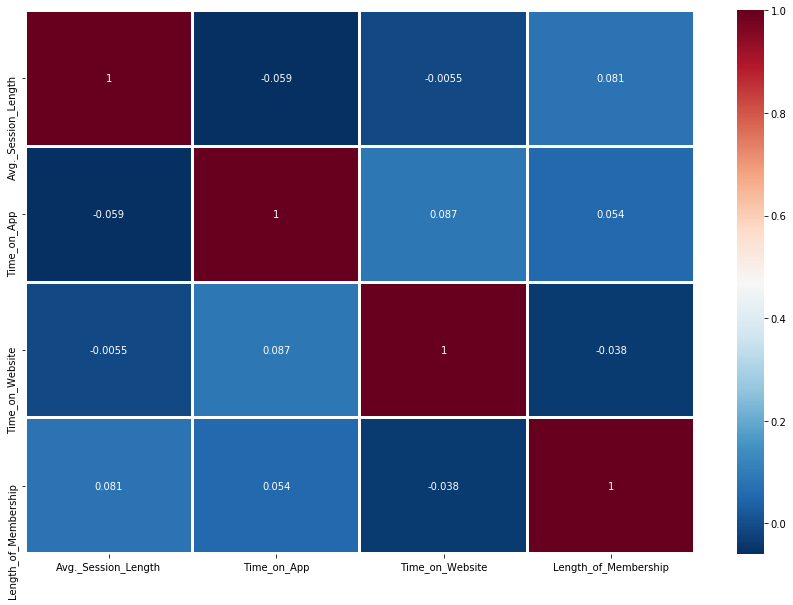

In [29]:
plt.figure(figsize = (15, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="RdBu_r", linecolor = 'white', linewidths = 2)
plt.show()

In [39]:
print(X_train.shape)
print(X_test.shape)

(400, 4)
(100, 4)


In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [43]:
lm.coef_

array([164.1738917 , 256.07203683,   1.91527048, 409.90052658])

## Predicting the Model

In [44]:
pred_2 = lm.predict(X_test)
print(pred_2)

[ 9749.1246988  10582.82473633 10383.14701962  9676.6805145
 10204.51090288  9931.45556485  9438.25875232 10576.4171417
  9866.62821897 10402.52992144  9873.63869867  9721.42325928
  9793.33164334 10021.45598405 11062.50455539 10107.34829467
 10054.35596698  9904.28215275 10055.09859522  9028.51127963
  9610.65846504 10149.73725966 10914.46647542 11197.98636828
  9373.73558966 10501.88076112 10070.14923877  9680.88036748
 10170.73554065  9836.36855849  9305.88275277  9850.99782591
  9966.72706396  9628.2255452  10562.52951309 11070.81998791
 10949.08323099 10265.33453182 10019.07573461 10226.85129985
 10452.44870308  9975.64100942 10139.34693989 10556.78995985
  9916.4269305  10705.78528779  9467.96557132 10040.88047602
 10311.43229504  9793.5938409  10516.28903238 10083.79477463
 11299.82140408 10297.93652109 10324.80037601 10050.09312167
  8862.30895443 10125.70717364  9582.21418225 10617.85482373
  9821.9975467  10268.06980744 10144.79647773 10192.59922763
  9485.82526381 10079.1414

Text(0, 0.5, 'Predicted Y')

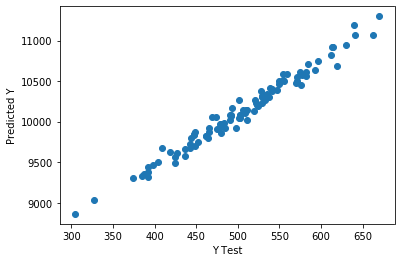

In [45]:
plt.scatter(y_test,pred_2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_2)))

Mean Absolute Error: 9622.797626179034
Mean Squared Error: 92757307.41284874
Root Mean Squared Error: 9631.059516628933
